In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<font size="5" color="red"><b>ch4. 머신러닝 모형 최적화</b></font>
# 1절.# 1절. 변수 선택과 차원 축소
## 1-1 변수선택과 차원축소
- 종속변수에 영향을 주는 변수들을 찾아 학습에 사용할 독립변수의 수를 줄임 (어떻게 하면 score를 높일 수 있을지?)
- 과적합과 변수들 사이의 다중공선성(변수들간 강한 상관관계)을 줄일 수 있음 
* 회귀계수 해석이 어려워짐. 모델 예측력이 좋아도 해석력이 떨어짐(어떤 변수가 제일 큰 요인인지 잘), p값이나 유의성 검정이 왜곡될 수 있음
- 모형의 학습 시간을 줄일 수 있음
- 주성분분석, 상관분석, **분류모형의 feature_importance_, 예측 모형의 coef_**
- SelectKBest : 가장 높은 score에 따라 K개의 특징을 선택
## 1-2 주성분분석(PCA, Principal Component Anaysis)
- 주성분분석은 변수 선택 및 차원축소 방법(기존의 모든 변수를 조합하여 새로운 변수로 만듦) 으로 널리 사용
- 주성분 분석은 상관관계가 있는 변수들을 선형결합해서 **분산이 극대화된 상관관계가 없는 새로운 변수(주성분)들로 축약**하는 것
- 주성분 분석은 사실 선형대수학이라기보다는 선형대수학의 활용적인 측면이 강하며 영상인식, 통계 데이터분석(주성분 찾기), 데이터 압축, 노이즈제거 등 여러 분야에 사용
- 영상처리에서 많이 활용 : 여러개의 영상 중 대표 이미지를 찾을 때 활용

In [5]:
import seaborn as sns
from sklearn.decomposition import PCA
iris = sns.load_dataset('iris')
iris_X, iris_y = iris.iloc[:, :-1], iris.species
iris_X.sample()

,sepal_length,sepal_width,petal_length,petal_width
8,4.4,2.9,1.4,0.2


In [6]:
pca = PCA(n_components=2) # n_components=2:주성분의 갯수
pca.fit(iris_X)
iris_pca = pca.transform(iris_X)
iris_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [7]:
# 각 주성분의 계수 : 각 주성분이 원래 특성들과 어떤 관계가 있는지 나타내는 가중치
pca.components_
# 주성분1 = 0.36138659*x1 -0.08452251*x2 0.85667061*x3 0.3582892*x4

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [8]:
# 설명분산 : 각 주성분 벡터가 정보량을 얼마나 잘 표현하는지(설명하는지)
pca.explained_variance_

array([4.22824171, 0.24267075])

In [9]:
# 설명분산을 0~1사이의 비율로 조정된 설명정도 : 주선분 결과 특성은 97.76852%
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

## 1-3 상관관계 확인
- 각변수들끼리의 상관관계 확인(시각화), 종속변수와 상관관계가 높은 변수들만 선택

In [12]:
import pandas as pd
# redwine = pd.read_csv('data/winequality-red.csv', dalimiter=';')
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1030,7.1,0.59,0.0,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,7


In [14]:
corr = redwine.corr()
# 상관관계 결과를 시각화(heatmap)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# cmap의 종류 : https://jrc-park.tistory.com/155
# http://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
# http://seaborn.pydata.org/examples/many_pairwise_correlations.html

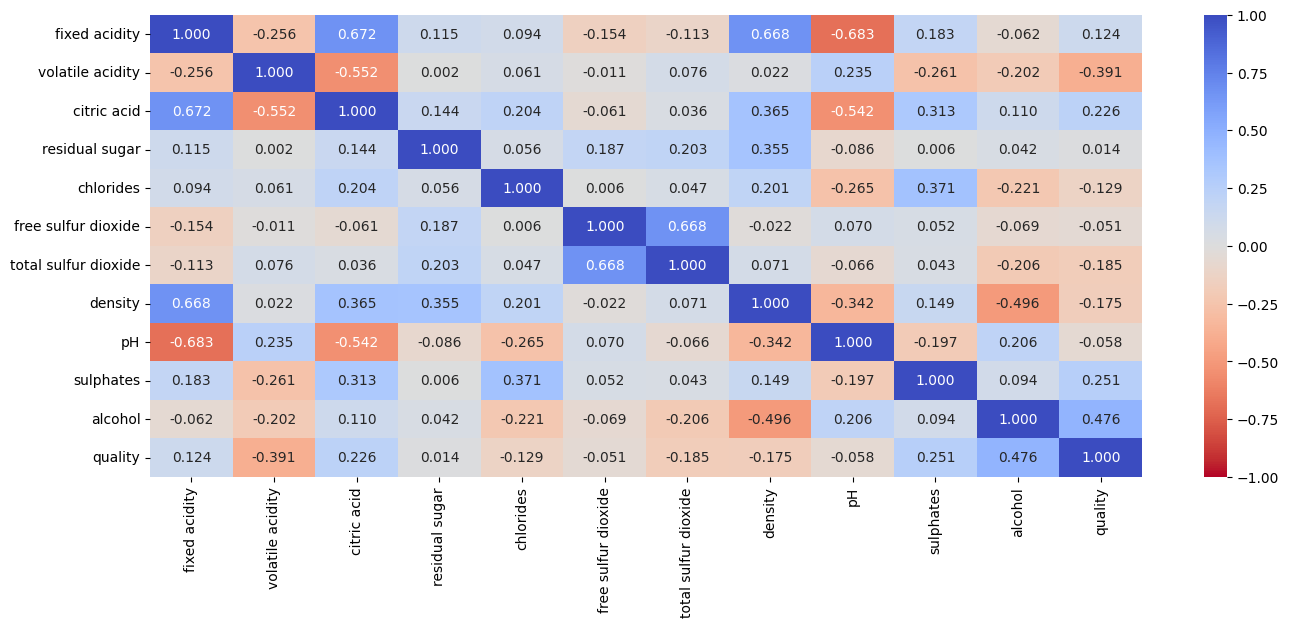

In [22]:
plt.figure(figsize=(16,6))
sns.heatmap(corr, annot=True, fmt='.3f', vmin=-1, vmax=1, cmap='coolwarm_r')
plt.show()

In [23]:
np.triu(np.ones_like(corr), k=0) # 대각선 포함 위가 1인 삼각행렬
np.triu(np.ones_like(corr), k=1) # 대각선 제외 위가 1인 삼각행렬
np.triu(np.ones_like(corr), k=0) # 대각선 제외 아래가 1인 삼각행렬
np.triu(np.ones_like(corr), k=-1) # 대각선 제외 아래가 1인 삼각행렬

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

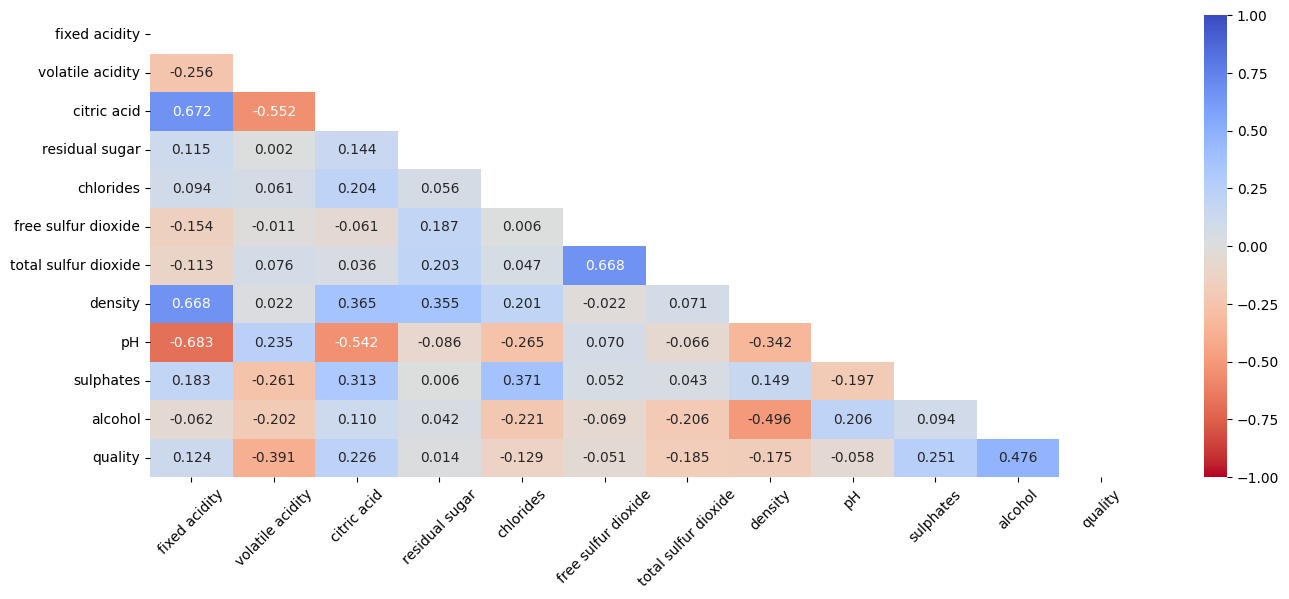

In [27]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt='.3f', vmin=-1, vmax=1, cmap='coolwarm_r',
           mask=mask)
plt.xticks(rotation=45)
plt.show()

## 1-4 분류모형의 Feature importance
- 분류모형의 feature_importance_ 속성은 각 독립변수들이 종속변수에 영향을 주는 정도
- LogisticRegression이나 SVC, MLP, GaussionNB등은 feature_importance_가 없음
- 그 외 분류모형은 사용가능

In [28]:
from sklearn.model_selection import train_test_split
X = redwine.iloc[:, :-1]
y = redwine.iloc[:, -1]
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                   test_size=0.3)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1119, 11), (480, 11), (1119,), (480,))

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, # 트리 갯수 10개
                                  random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [33]:
rf_model.feature_importances_

array([0.07877566, 0.09081823, 0.07069352, 0.07685335, 0.07729835,
       0.07352811, 0.10380961, 0.08656292, 0.0815618 , 0.10814893,
       0.15194951])

In [34]:
train_X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [36]:
features = pd.DataFrame(data = np.c_[X.columns, rf_model.feature_importances_],
                        columns=['feature', 'importance']
                       )
features['importance'].sum()

1.0

In [37]:
features.sort_values(by='importance', ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features.head()

,feature,importance
0,alcohol,0.15195
1,sulphates,0.108149
2,total sulfur dioxide,0.10381
3,volatile acidity,0.090818
4,density,0.086563


### featrue_importance_를 이용한 변수 중요도 시각화

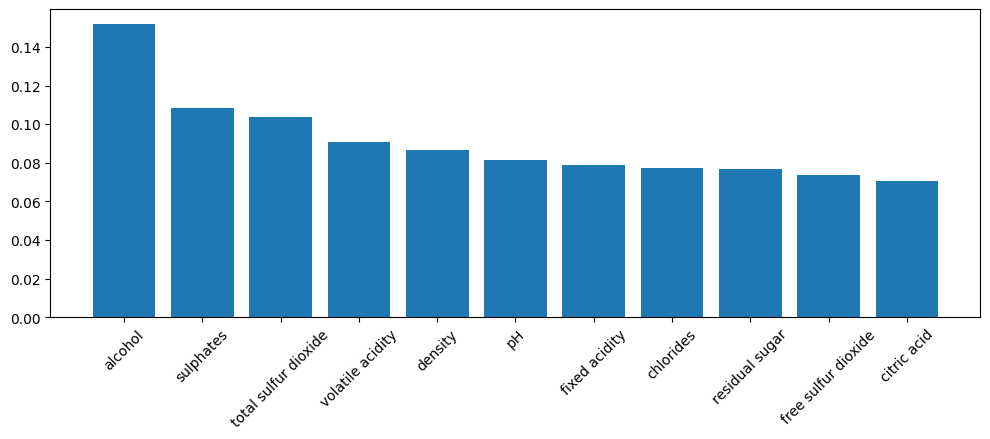

In [38]:
plt.figure(figsize=(12,4))
plt.bar(features.feature, features.importance)
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [41]:
# features.importance 누적합
# l = [1,2,3]
# np.cumsum(l)
y_stack = np.cumsum(features.importance)
np.c_[features.importance, y_stack]

array([[0.15194950741435878, 0.15194950741435878],
       [0.10814892744678428, 0.26009843486114304],
       [0.10380961046642563, 0.36390804532756865],
       [0.09081822916015639, 0.45472627448772507],
       [0.08656292356705142, 0.5412891980547765],
       [0.08156180093160416, 0.6228509989863806],
       [0.07877566357924379, 0.7016266625656244],
       [0.07729835287180209, 0.7789250154374265],
       [0.07685334935846423, 0.8557783647958908],
       [0.07352811186634603, 0.9293064766622368],
       [0.07069352333776324, 1.0]], dtype=object)

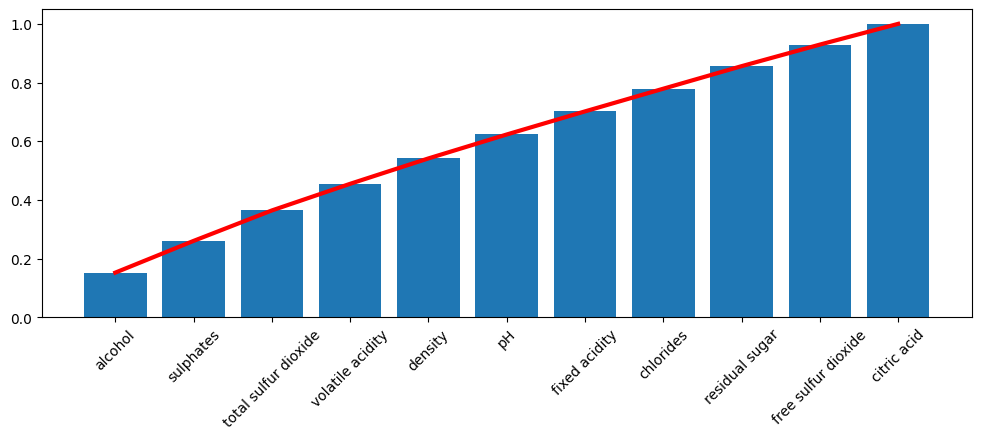

In [44]:
# 누적합을 이용하여 시각화
plt.figure(figsize=(12,4))
plt.bar(features.feature, y_stack)
plt.plot(features.feature, y_stack, color='red', lw=3)
plt.xticks(rotation=45, fontsize=10)
plt.show()

### RFE(Recursive Feature Elimination) 방식
- RFE 클래스를 이용 : 중요도에 따라 중요도가 낮은 변수부터 하니씩 제거해가면서 최종 선택된 개수만큼 중요도가 높은 변수를 찾는다.

In [47]:
# 5개 특징이 남을 때까지 변수를 제거(기준:feature_importances_)
from sklearn.feature_selection import RFE
rfe = RFE(rf_model,
         n_features_to_select=5)
rfe.fit(train_X, train_y)
rfe.get_support()

array([False,  True, False, False, False, False,  True, False,  True,
        True,  True])

In [50]:
features_ref = pd.DataFrame(np.c_[X.columns, rfe.get_support()],
                           columns=['feature', 'selected'])
features_ref[features_ref.selected==True]

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
8,pH,True
9,sulphates,True
10,alcohol,True


## 1-5 SelectKBest
- 가장 높은 score에 따라 k개 feature 선택

In [51]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
X.shape, y.shape, type(X), type(y)

((150, 4), (150,), numpy.ndarray, numpy.ndarray)

In [52]:
features_names = iris.columns[:-1].tolist()
features_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [53]:
# 가장 중요한 feature 1개 추출
# f_classif : y는 범주형, x는 연속형
# chi2 : y는 범주형, x는 범주형, 양의 실수
# mutual_info : 비선형 데이터 고려...
X_new = SelectKBest(f_classif, # x가 연속형
                   k=1 # 추출될 feature 갯수
                   ).fit_transform(X,y)
X_new

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [54]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2절. 파라미터 선택
- 하이퍼파라미터(사용자가 직접 설정할 수 있는 파라미터). 최적의 결과를 내는 하이퍼 파라미터값?
    1. validation_curve() : 단일 하이퍼 파라미터 최적화 함수
    2. GridSearchCV() : 복수 하이퍼 파라미터 최적화 클랙스(가장 높은 socre를 내는 모형까지 찾아줌)
    
## 2-1 validation_curve()
- param_name, param_range(리스트), scoring(성능기준지표) 매개변수로 받아 최적의 성능 계산

In [59]:
# 데이터
from sklearn.datasets import load_digits
digits = load_digits()
# digits.data : (1797, 64) 배열 (독립변수)
# digits.images (1797, 8, 8) 배열
# digits.target : 1797 열 배열 (타겟변수)
# digits.targer_names : 타겟변수의 내용
X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [61]:
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [62]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [64]:
np.all(X[0].reshape(8,8) == digits.images[0])

True

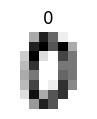

In [68]:
plt.figure(figsize=(1,1))
plt.imshow(X[0].reshape(8,8), cmap='gray_r')
plt.title(y[0])
plt.axis('off')
plt.show()

In [70]:
from sklearn.svm import SVC
model = SVC(probability=True) # probability=True: 판별모형이라도 proba 가능
model.fit(X, y)

SVC(probability=True)

In [71]:
# 예측값
model.predict(X[0].reshape(1, -1))

array([0])

In [73]:
# 예측확률
print(model.classes_)
print(model.predict_proba(X[0].reshape(1,-1)))

[0 1 2 3 4 5 6 7 8 9]
[[9.91023323e-01 1.84489740e-04 4.78266016e-04 8.83206781e-04
  6.30215642e-04 1.37159110e-03 7.51476254e-04 9.51456139e-04
  7.65530475e-04 2.96044527e-03]]


In [78]:
for c, p in zip(model.classes_,
               model.predict_proba(X[0].reshape(1,-1))[0]) :
    print("{}일 확률 : {:.3f}".format(c,p))

0일 확률 : 0.991
1일 확률 : 0.000
2일 확률 : 0.000
3일 확률 : 0.001
4일 확률 : 0.001
5일 확률 : 0.001
6일 확률 : 0.001
7일 확률 : 0.001
8일 확률 : 0.001
9일 확률 : 0.003


In [79]:
model.score(X, y)

0.996661101836394

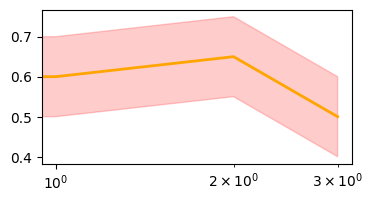

In [80]:
import matplotlib.pyplot as plt
import numpy as np
range = np.array([0,1,2,3])
score = np.array([0.5, 0.6, 0.65, 0.5])
plt.figure(figsize=(4,2))
plt.semilogx(range, score, color='orange', lw=2)
plt.fill_between(range, score-0.1, score+0.1, color='r', alpha=0.2)
plt.show()

In [84]:
# SVC() 모형에서 C파라미터 값을 다음의 범위 중 제일 좋은 C 값?
# 10의 -6승부터 10의 -1승까지 로그간격으로 균등분포 10개를 추출
param_range = np.logspace(-6, -1, 10)
param_range

array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])

In [86]:
%%time
from sklearn.model_selection import validation_curve
train_score, test_score = validation_curve(
    SVC(), # 예측모형
    X, y,
    param_name="gamma",
    param_range=param_range, # list로 파라미터 전달
    cv=10, # 교차검증: 데이터 10개중 1개씩 test 데이터로 검증하고 평균 score
    scoring="accuracy",
    n_jobs=-1 # 시스템의 모든 core 사용
)

CPU times: total: 578 ms
Wall time: 18.5 s


In [88]:
test_score.shape, train_score.shape

((10, 10), (10, 10))

In [94]:
train_score_mean = np.mean(train_score, axis=1) # 행별평균
test_score_mean = np.mean(test_score, axis=1)
train_score_std = np.std(train_score, axis=1)
test_score_std = np.std(test_score, axis=1)

In [95]:
train_score_mean

array([0.13836306, 0.72045751, 0.93439655, 0.96939318, 0.98775736,
       0.99789765, 1.        , 1.        , 1.        , 1.        ])

In [96]:
test_score_mean

array([0.13871508, 0.70395717, 0.90871198, 0.94264742, 0.95880509,
       0.97495655, 0.97496586, 0.80522036, 0.19709497, 0.10463687])

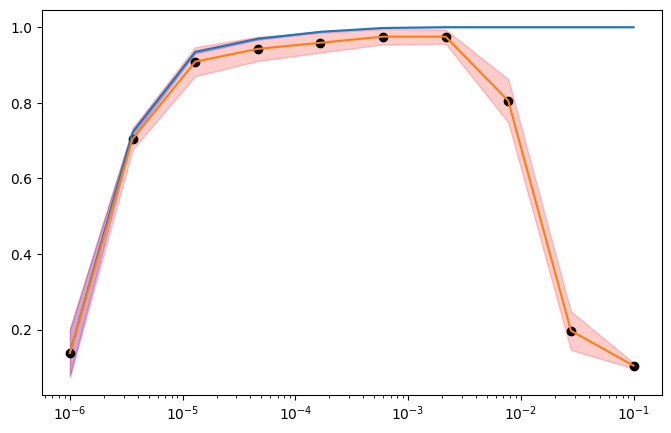

In [100]:
plt.figure(figsize=(8,5))
plt.semilogx(param_range, train_score_mean)
plt.fill_between(param_range, train_score_mean-train_score_std,
                train_score_mean+train_score_std,
                alpha=0.2,
                color='blue')
plt.semilogx(param_range, test_score_mean)
plt.fill_between(param_range, test_score_mean-test_score_std,
                test_score_mean+test_score_std,
                alpha=0.2,
                color='red')
plt.scatter(param_range, test_score_mean, c='k')

In [101]:
test_score_mean.argmax()

6

In [103]:
# 최적의 gammar값
gammar = param_range[6]
gammar

0.0021544346900318843

In [104]:
model = SVC(gamma=gammar).fit(X, y)

In [105]:
model.score(X, y)

1.0

## 2-2 GridSearchCV
- 복수개의 하이퍼 파라미터 최적화 클래스
- 모형도 가지고 옴
- fit(), score(), predict(), predict_proba(), decision_funcion()

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC

# 데이터
import pandas as pd
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_X, redwine_y = redwine.iloc[:, :-1], redwine.iloc[:, -1]
redwine_X.shape, redwine_y.shape

((1599, 11), (1599,))

In [112]:
%%time
# SelectKBest로 최적의 독립변수 k개 찾음 -> SVC()에서 최적의 C값을 찾음
selection = SelectKBest(k=1) # 가장 평가 점수가 높은 k개 찾음
svc = SVC(kernel='linear') #직선으로 나누는 가장 단순한 분류모형
pipeline = Pipeline([('select', selection), ('svc', svc)])
param_grid = dict(select__k = [4,5,6,7,8,9,10,11],
        svc__C = [0.1, 1, 10] # 오차 범위 허용 정도(큰C:엄격, 작은C:허용범위 큼)
)
grid_search = GridSearchCV(
                pipeline,
                param_grid=param_grid, # 파라미터들
                cv=2,
                verbose=2, # 로그 출력의 수다스러운 정도
                n_jobs=-1
)
grid_search.fit(redwine_X.values, redwine_y.values)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
CPU times: total: 20.3 s
Wall time: 2min 45s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('select', SelectKBest(k=1)),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'select__k': [4, 5, 6, 7, 8, 9, 10, 11],
                         'svc__C': [0.1, 1, 10]},
             verbose=2)

# 3절. 자료 불균형 처리
- 단순 언더/오버 샘플링
- 단, 단순 오버샘플링시 소수의 데이터를 복사하면, 과적합 우려
- 오버샘플링하는 방법 : SMOTE
## 3-1 SMOTE를 이용한 오버샘플링 전

In [115]:
# 데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000,
                          n_features=10, # 독립변수 갯수
                          n_informative=5, # 타겟변수에 영향을 미치는 독립변수
                          n_redundant=0,
                          n_clusters_per_class=1,
                          n_classes=2,
                          weights=[0.99, 0.01], # 각 클래스에 할당된 표본 
                          random_state=42)
y.mean()

0.014

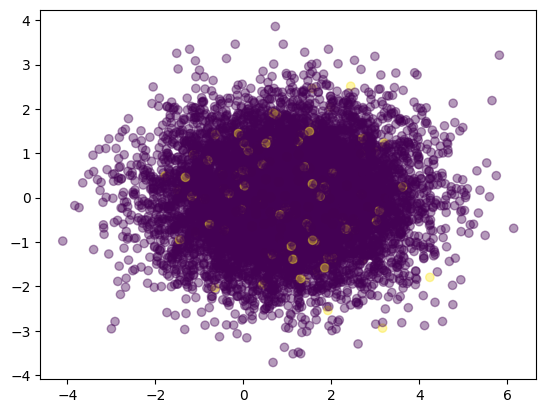

In [116]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.4)

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,
                                 max_features=2,
                                 random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=42)

In [120]:
y_hat = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_hat)

array([[2958,    0],
       [  34,    8]], dtype=int64)

In [121]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.19      0.32        42

    accuracy                           0.99      3000
   macro avg       0.99      0.60      0.66      3000
weighted avg       0.99      0.99      0.98      3000



## 3-2 SMOTE를 이용한 전체 오버샘플링 후 데이터 셋 분리
- imbalanced_learn 라이브러리 install

In [126]:
# 0그룹과 1그룹의 갯수
df = pd.DataFrame(np.c_[X, y])
df.iloc[:,-1].value_counts()

0.0    9860
1.0     140
Name: 10, dtype: int64

In [131]:
from imblearn.over_sampling import SMOTE
sm = SMOTE() # 0그룹 : 1그룹 = 1:1
# sm = SMOTE(sampling_strategy={0:9860, 1:420})
X_resampled, y_resample = sm.fit_resample(X, y)
X_resampled.shape, y_resample.shape

((19720, 10), (19720,))

In [132]:
# 0그룹과 1그룹의 갯수
df = pd.DataFrame(np.c_[X_resampled, y_resample])
df.iloc[:,-1].value_counts()

0.0    9860
1.0    9860
Name: 10, dtype: int64

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=42)
rf_model = RandomForestClassifier(n_estimators=100,
                                 max_features=2,
                                 random_state=42)
rf_model.fit(X_train, y_train)
y_hat = rf_model.predict(X_test)
confusion_matrix(y_test, y_hat)

array([[2958,    0],
       [  34,    8]], dtype=int64)

In [134]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.19      0.32        42

    accuracy                           0.99      3000
   macro avg       0.99      0.60      0.66      3000
weighted avg       0.99      0.99      0.98      3000



## 3-3 가중치 제어
- 자료 불균형 처리의 또 다른 방법
- sklearn의 예측 모형에서 class_weigh 매개변수 설정

In [137]:
rf_model = RandomForestClassifier(n_estimators=100,
                                 max_features=2, 
                                 class_weight={0:1, 1:1.4}, # 1그룹을 1.4배 더 중요하게
                                 random_state=42
                                 )
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1.4}, max_features=2,
                       random_state=42)

# 4절. 앙상블 모형
- 목적 : 여러 분류모형을 하나의 메타 분류모델로 연결하여 개별 모형보다 더 좋은 일반화 성을 달성
- 방법 : 
    * 하나의 메타 분류 알고리즘 이용 : 배깅(bagging), 부스팅(boosting)
    * 여러 분류 알고리즘을 이용 : 다수결투표
- 배깅 vs 부스팅
    * 배깅
        - 복원추출로 데이터를 뽑아 병렬 학습 후 score가 높은 모델에 가중치 부여
        - 과적합 줄일 수 있음.
        - 데이터가 충분하고 과적합을 방지하면서 안정적인 모델이 필요할 때
        - RandomForestClassifier, BagginClassifier
    * 부스팅
        - 순차적으로 모델 학습. 앞의 모델에서 틀린 데이터의 50%를 재학습
        - 오답에 가중치를 둠(오답에 더 집중)
        - 성능 극대화
        - 성능 극대화해야 하는데, 데이터가 비교적 적저나 패턴의 학습을 해야함.

## 4-1 배깅알고리즘

In [138]:
wine_df = pd.read_csv('data/wine.csv')
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [139]:
X = wine_df.iloc[:, 1:]
y = wine_df['Class label']
X.shape, y.shape

((178, 13), (178,))

In [140]:
y.value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [141]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=1)

In [143]:
# 의사결정나무 알고리즘
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='entropy', random_state=1)
tree_model.fit(train_X, train_y)
tree_model.score(test_X, test_y)

0.9074074074074074

In [145]:
# 배깅알고리즘
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(estimator=tree_model,
                             n_estimators=500,
                             bootstrap=True, # 복원추출을 허용
                             bootstrap_features=False, # 모든 feature 사용해서 학습
                             random_state=1
                             )
bag_model.fit(train_X, train_y)
bag_model.score(test_X, test_y)

0.9629629629629629

In [146]:
# 랜덤포레스트알고리즘
rf_model = RandomForestClassifier().fit(train_X, train_y)
rf_model.score(test_X, test_y)

1.0

### 배깅 알고리즘시 0.632규칙

In [147]:
np.random.choice(10, 10, replace=True) # 10개 데이터를 10개 복원추출 뽑기

array([5, 2, 7, 4, 7, 8, 1, 9, 9, 6])

In [152]:
len(set(np.random.choice(10000, 10000, replace=True)))

6342

In [154]:
N = 10000
len(set(np.random.choice(N, N))) / N

0.6292

## 4-2 임의의 데이터를 만들어 최적 모형 탐색

In [180]:
X, y = make_classification(n_samples=1000,
                          n_features=10,
                          n_informative=5,
                          n_redundant=0,
                          n_classes=2,
                          n_clusters_per_class=1,
                          weights=[0.9, 0.1], # 0그룹이 90%, 1그룹 10%
                          random_state=42)

In [172]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=42)
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
resampled_X.shape, resampled_X.shape, test_X.shape, test_y.shape

((12556, 10), (12556, 10), (3000, 10), (3000,))

In [173]:
from sklearn.metrics import precision_score, recall_score, f1_score
def model_measure(model, train_X=resampled_X, train_y=resampled_y,
                 test_X=test_X, test_y=test_y):
    '매개변수로 들어온 model 학습후 accuracy, precision, recall, f1score를 반환'
    model.fit(train_X, train_y)
    y_hat = model.predict(test_X) # 모델 예측값
    accuracy = model.score(test_X, test_y)
    precision = precision_score(test_y, y_hat)
    recall = recall_score(test_y, y_hat)
    f1score = f1_score(test_y, y_hat)
    return "정확도:{:.3f}, 정밀도:{:.3f}, 재현율:{:.3f}, f1 :{:.3}".format(
            accuracy, precision, recall, f1score
    )

In [174]:
model_measure(RandomForestClassifier(n_estimators=100,
                                    max_features=2,
                                    random_state=42))

'정확도:0.983, 정밀도:0.936, 재현율:0.893, f1 :0.914'

In [175]:
model_measure(SVC(random_state=42))

'정확도:0.987, 정밀도:0.950, 재현율:0.926, f1 :0.938'

## 4-3 부스팅 알고리즘
- Adaboost, XGB, LGBM, CatBoost

In [177]:
from sklearn.ensemble import AdaBoostClassifier
model_measure(AdaBoostClassifier())

'정확도:0.960, 정밀도:0.750, 재현율:0.922, f1 :0.827'

In [178]:
# pip install --dray-run xgboost=1.7.3 후 설치
from xgboost import XGBClassifier
model_measure(XGBClassifier(max_depth=10, # tree 최대깊이
                           n_estimators=100, # 나무갯수
                           learning_rate=0.01)) # 학습율

'정확도:0.970, 정밀도:0.835, 재현율:0.887, f1 :0.86'

In [179]:
from lightgbm import LGBMClassifier # pip install lightbm
model_measure(LGBMClassifier(force_col_wise=True))

[LightGBM] [Info] Number of positive: 6278, number of negative: 6278
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 12556, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


'정확도:0.986, 정밀도:0.959, 재현율:0.906, f1 :0.932'

## 4-4 투표를 이용한 앙상블
- voting='hard' : 다수결로 투표
- voting='soft' : 확률의 합을 계산한 투표

In [181]:
X, y = make_classification(n_samples=200,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          n_clusters_per_class=1,
                          random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                   test_size=0.3,
                                                   stratify=y,
                                                   random_state=42)


In [184]:
tf_model = RandomForestClassifier(max_features=2, random_state=42)
xgb_model = XGBClassifier(max_depth=10,
                         n_estimators=100,
                         learning_rate=0.01, # 0.01~0,2
                         eval_metric="logloss")
lgb_model = LGBMClassifier(n_estimators=100, force_col_wise=True, verbose=-1)
print(model_measure(tf_model))
print(model_measure(xgb_model))
print(model_measure(lgb_model))

정확도:0.983, 정밀도:0.936, 재현율:0.893, f1 :0.914
정확도:0.970, 정밀도:0.835, 재현율:0.887, f1 :0.86
정확도:0.986, 정밀도:0.959, 재현율:0.906, f1 :0.932


In [186]:
%%time
from sklearn.ensemble import VotingClassifier
v_model = VotingClassifier(estimators=[('rfm',rf_model),
                                      ('xgb',xgb_model),
                                      ('lgb',lgb_model)],
                          voting='hard')
v_model.fit(train_X, train_y)

CPU times: total: 453 ms
Wall time: 212 ms


VotingClassifier(estimators=[('rfm', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            in...onstraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('lgb',
                              LGBMClassifier(force_col_wise=True, verbose=-1))])

In [187]:
%%time
from sklearn.ensemble import VotingClassifier
v_model = VotingClassifier(estimators=[('rfm',rf_model),
                                      ('xgb',xgb_model),
                                      ('lgb',lgb_model)],
                          voting='soft')
v_model.fit(train_X, train_y)

CPU times: total: 359 ms
Wall time: 201 ms


VotingClassifier(estimators=[('rfm', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            in...e,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('lgb',
                              LGBMClassifier(force_col_wise=True, verbose=-1))],
                 voting='soft')